# Logistic Regression: Multiclass Classification

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()#loading our training set



<Figure size 432x288 with 0 Axes>

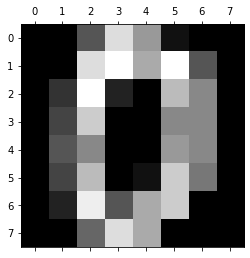

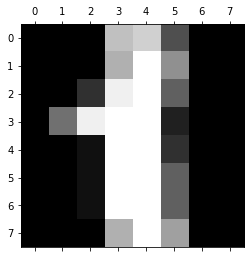

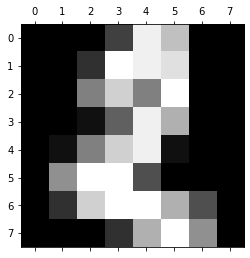

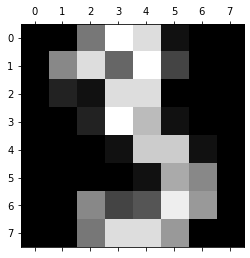

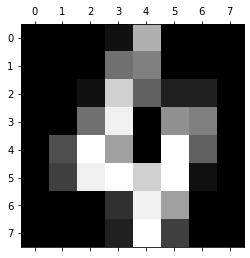

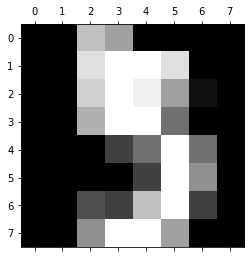

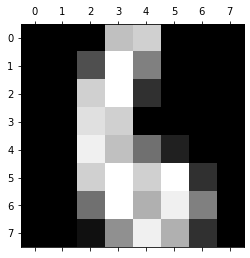

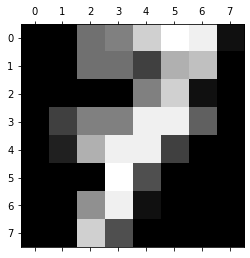

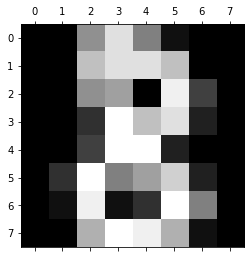

In [6]:
plt.gray() 
for i in range(9):
    plt.matshow(digits.images[i]) 

In [7]:
dir(digits)#explore what our training set contain

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[9]#data contains real data, as image is 8*8 , so it is 1D array, thats why it has 64

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

# Create and train logistic regression model



In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()#object



In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)


In [14]:
model.fit(X_train, y_train) #training the model


/home/shivani/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
import pickle
with open('model_pickle1','wb') as f:
    pickle.dump(model,f)

In [16]:
with open('model_pickle1','rb') as f:
    m1 = pickle.load(f)

In [17]:
m1.predict(digits.data[0:5])


array([0, 1, 2, 3, 4])

In [18]:
m1.score(X_test, y_test)


0.9694444444444444

# Confusion Matrix

In [20]:
y_predicted = m1.predict(X_test)


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]])

Text(69.0, 0.5, 'Truth')

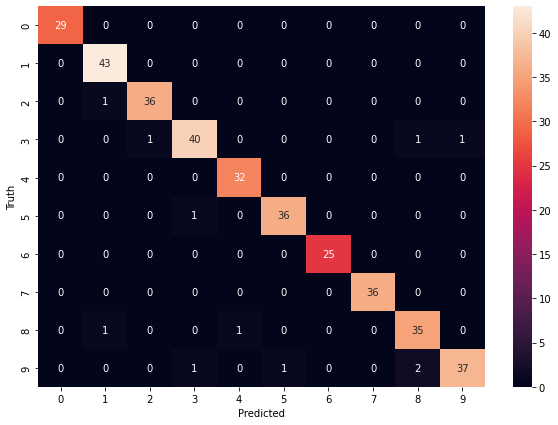

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [23]:
import pickle
with open('model_pickle1','rb') as f:
    m1 = pickle.load(f)
m1.predict(digits.data[7:23])

In [24]:
m1.predict(digits.data[7:23])

array([7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2])